# Data Analysis with Weather Data from Belem, Spain
Dataset can be found at: https://www.kaggle.com/volpatto/temperature-timeseries-for-some-brazilian-cities/data#

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
belem = pd.read_csv("station_belem.csv")
belem.shape

(59, 18)

In [9]:
belem.head(n=8)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1961,26.43,25.530,25.88,26.07,26.31,26.64,26.77,26.720,26.62,26.460,26.50,26.510,26.19,26.09,26.71,26.53,26.38
1,1962,26.30,26.060,26.15,26.04,26.83,26.74,26.71,26.940,26.87,26.800,26.68,26.910,26.29,26.34,26.80,26.78,26.55
2,1963,26.25,26.030,26.02,26.42,27.17,26.94,26.93,26.980,26.96,26.850,27.06,26.240,26.40,26.54,26.95,26.96,26.71
3,1964,25.70,25.520,25.41,25.75,26.55,26.91,27.16,27.340,27.32,27.885,27.77,27.535,25.82,25.90,27.14,999.90,26.39
4,1965,26.89,26.965,27.01,27.21,27.51,27.50,27.24,27.475,27.50,27.885,27.77,27.535,999.90,999.90,999.90,999.90,999.90
5,1966,26.89,26.965,27.01,27.21,27.51,27.50,27.24,27.475,27.50,27.885,27.77,27.535,999.90,999.90,999.90,999.90,999.90
6,1967,26.55,25.990,25.93,26.24,26.33,26.43,26.19,26.000,27.50,26.010,26.42,26.080,26.48,26.17,26.21,26.17,26.26
7,1968,25.99,26.965,25.74,27.21,27.51,26.38,26.67,26.760,26.86,26.940,26.87,26.730,25.90,999.90,26.60,26.89,26.41


Dataset contains numbers from 1961 to 2019 in Belem, Spain
* Notice: value 999.90 is error. 

In [12]:
def error_count(df):
    percent = list()
    for column in df.columns[1:-5]:
        count = 0
        for i in range(len(df)):
            if df[column][i] == 999.90:
                count += 1
                
        _percent = round(count/len(df) * 100, 2)
        percent.append(_percent)
    
    data = {'Month': df.columns[1:-5],
          'Error (%)': percent}
    
    return pd.DataFrame(data, columns = ['Month', 'Error (%)'])

error_count(belem)

,Month,Error (%)
0,JAN,0.0
1,FEB,0.0
2,MAR,0.0
3,APR,0.0
4,MAY,0.0
5,JUN,0.0
6,JUL,0.0
7,AUG,0.0
8,SEP,0.0
9,OCT,0.0


Calculate the percentage of error in each column

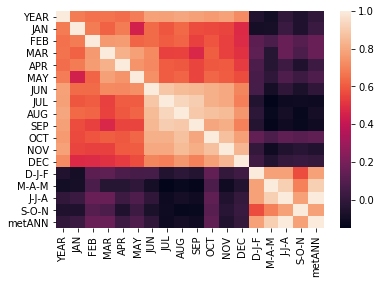

In [13]:
import seaborn as sn
sn.heatmap(belem.corr())

Here can we observe the correlation heatmap of each variable in the dataset. 

In [14]:
def imputation(df):
    #impute = median
    for column in df.columns[1:-5]:
        median = np.median([i for i in df[column] if i != 999.90])
        for i in range(len(df)):
            if df[column][i] == 999.90:
                df[column][i] = median
    return df.iloc[:,:-5]
imputation(belem).head(n=8)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1961,26.43,25.530,25.88,26.07,26.31,26.64,26.77,26.720,26.62,26.460,26.50,26.510
1,1962,26.30,26.060,26.15,26.04,26.83,26.74,26.71,26.940,26.87,26.800,26.68,26.910
2,1963,26.25,26.030,26.02,26.42,27.17,26.94,26.93,26.980,26.96,26.850,27.06,26.240
3,1964,25.70,25.520,25.41,25.75,26.55,26.91,27.16,27.340,27.32,27.885,27.77,27.535
4,1965,26.89,26.965,27.01,27.21,27.51,27.50,27.24,27.475,27.50,27.885,27.77,27.535
5,1966,26.89,26.965,27.01,27.21,27.51,27.50,27.24,27.475,27.50,27.885,27.77,27.535
6,1967,26.55,25.990,25.93,26.24,26.33,26.43,26.19,26.000,27.50,26.010,26.42,26.080
7,1968,25.99,26.965,25.74,27.21,27.51,26.38,26.67,26.760,26.86,26.940,26.87,26.730


This step is to impute all the errors by replacing them with median. 

In [15]:
belem.iloc[:, 1:].describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,26.976610,26.928051,26.965424,27.245932,27.520508,27.508136,27.356102,27.574153,27.594576,27.763644,27.800339,27.575508,290.941695,274.537627,274.723559,291.358305,274.631864
std,0.613007,0.650627,0.673704,0.611449,0.558361,0.550428,0.595686,0.652584,0.665915,0.674924,0.651968,0.574552,436.173085,427.156227,427.046714,435.916861,427.100689
min,25.700000,25.520000,25.410000,25.750000,26.310000,26.380000,26.190000,26.000000,26.340000,26.010000,26.420000,26.080000,25.820000,25.900000,26.210000,26.170000,26.260000
25%,26.625000,26.740000,26.645000,27.040000,27.260000,27.180000,26.980000,27.190000,27.120000,27.355000,27.410000,27.370000,26.860000,26.995000,27.140000,27.410000,27.100000
50%,26.890000,26.965000,27.010000,27.210000,27.510000,27.500000,27.240000,27.475000,27.500000,27.885000,27.770000,27.535000,27.420000,27.600000,27.810000,28.240000,27.770000
75%,27.285000,27.205000,27.235000,27.550000,27.825000,27.765000,27.740000,27.935000,28.035000,28.125000,28.360000,27.935000,999.900000,514.300000,514.310000,999.900000,514.265000
max,28.600000,28.300000,29.050000,28.870000,28.840000,28.710000,28.800000,29.060000,29.210000,28.920000,29.150000,28.700000,999.900000,999.900000,999.900000,999.900000,999.900000


We can also observe basic statistics of the dataset.

In [16]:
def year_plotting(df):
    choice = int(input('Press 1: A specific year \nPress 2: A range of years\n'))
    while choice != 1 and choice != 2:
        print('Wrong answer. Please pick a valid number:')
        choice = int(input())
        
    if choice == 1:
        select = int(input('Which year are you interested in?\n'))
        y = df[df['YEAR'] == select].iloc[:, 1:-5].values[0]
        x = list(belem.columns[1:-5])
        plt.plot(x, y);
        
        
    if choice == 2:
        select = input('From which year to which year are you interested in [yyyy - yyyy]?\n')
        select = select.split()
        start, end = int(select[0]), int(select[-1])
        
        vals = df[(df['YEAR'] >= start) & (df['YEAR'] <= end)].iloc[:, 1:-5].values
        data = [i for val in vals for i in val]
        
        x_axis = list()
        gap = end - start
        
        while gap >= 0:
            months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            year = str(start)[2:]
            months = [month + year for month in months]
            x_axis.append(months)
            
            start += 1
            gap -= 1
        
        x_axis = [i for val in x_axis for i in val]
        plt.rcParams["figure.figsize"] = [16,9]
        plt.plot(x_axis, data)
        frequency = 6
        plt.xticks(x_axis[::frequency], x_axis)

Press 1: A specific year 
Press 2: A range of years
1
Which year are you interested in?
1990


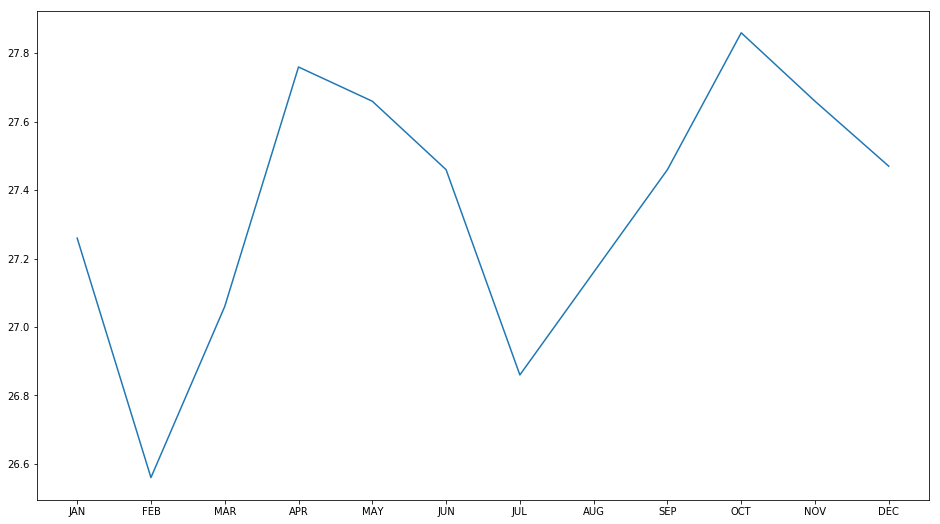

In [294]:
year_plotting(belem)

Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
1990 2010


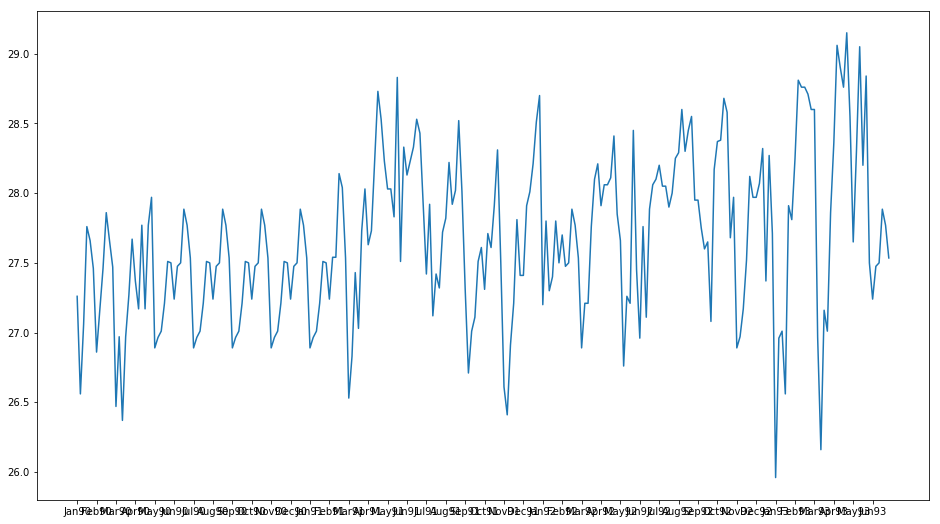

In [295]:
year_plotting(belem)

The first part where the temperatures remain stable appears to contain a lot of errors. Other than that, the clearest pattern can be seen is that: the temperature fluctuates strongly and increases over time. 

Compare the fluctuation between years can be hard to observe, we can separate it by using "for" loop

Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
1990 1995
Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
1996 2000
Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
2001 2005
Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
2006 2010


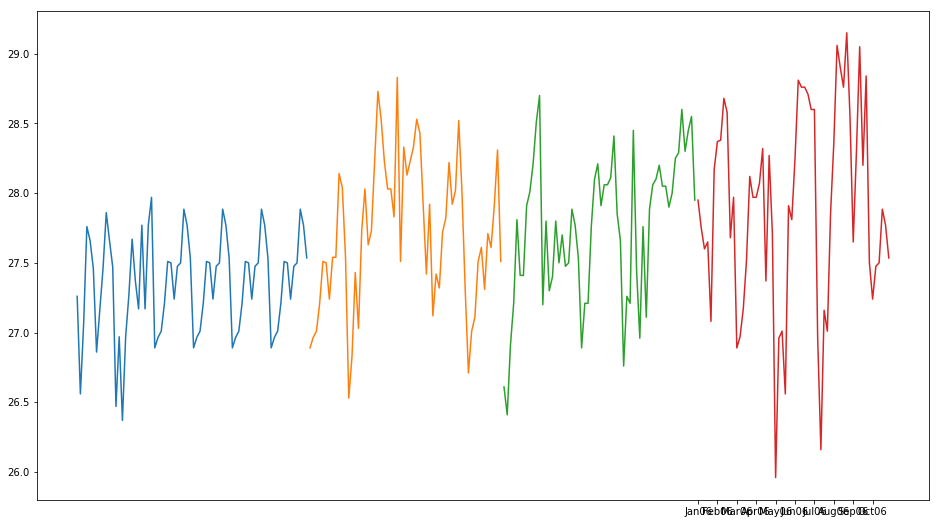

In [298]:
for i in range(4):
    year_plotting(belem)

Each period of 5 years is displayed with different color. However, the problem appears to be the x-axis. 
We can also notice the space in the plot, which indicates the error in the dataset where they were replaced with median. It can also be believed that the first period contains a lot of replaced values. 

Based on the plot, we can see that:
* 1990 - 1995: the temperature ranges stably between aroudn 26.8 and 28. 
* 1996 - 2006: temperature starts to contract strongly with months exceeds 28.5 and further downto under 26.5. The gap seems to be bigger between months. However, the fluctuation seems to be still under control.
* 2006 - 2010: the temperature begins to contract significantly with the drop of more than 2 degrees in the two consecutive months. 

Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
2010 2015
Press 1: A specific year 
Press 2: A range of years
2
From which year to which year are you interested in [yyyy - yyyy]?
2016 2019


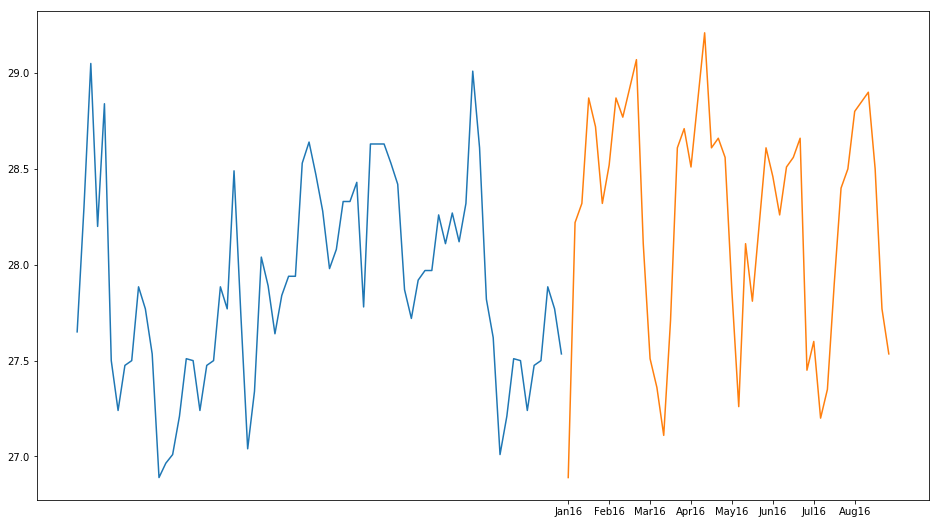

In [19]:
for i in range(2):
    year_plotting(belem)

The period 2010 - 2019: the pattern seems to be unpredictable. However, the most important pattern can be learned is that the temperature is increasing nevertheless. It displays strongly in the period of 2010 - 2015. 

The last period of 2016 - 2019, the temperature seems to be quite extreme. It leans either towards to the highest or to the lowest, with more months remain at the highest. That matches with the prediction and caution of scientists these days regarding the global warming.

Overall, the weather at Belem is getting hotter with much extreme drop that can severely affect the health of its citizens. Sudden change in temperature can lead to serious health disease if not being well-prepared in advance. With this pattern, it appears to be that the next peak temperature can exceed the current approx. 29.2 while the lowest can revolve around approx. 26.2 (with higher confidence that it would be higher than 26.2).

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [21]:
X = belem.iloc[:, 2:-5].values
y = belem.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)


In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.333815639954445

In [23]:
from sklearn import preprocessing

data = belem.values

# scaling data
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(data)

# define what to predict
X = data_scaled[:, 2:-5]
y = data_scaled[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mean_squared_error(y_test, y_pred)

0.03969270391848325

Testing ML Regression with and without scaling data. 

The results are quite obvious, whereas data scaled performs much better than the other one. The metric used to calculate its performance is root mean squared error (RMSE). Simply said, the close to 0 of RMSE, the more accurate the model becomes. 